# Introduction
* This dataset contains information about various affordable housing projects, including geographic,demographic, and financial data. It provides insights into the distribution, affordability, and status of housing developments across different income groups and regions. This notebook will explore the dataset and generate insights into the location, income categories, project status, and more, to aid in urban planning and policy development.

* The main goal is to identify trends, gaps, and opportunities for enhancing affordable housing distribution.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/affordable-housing-city-of-washington-dc/Affordable_Housing.csv


# Importing necessary libraries

In [2]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns            # For statistical data visualization
import folium                     # For mapping geographical data
from geopy.distance import geodesic  # For calculating distances between locations
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables

# Load and Inspect the Dataset

In [3]:
file_path = '/kaggle/input/affordable-housing-city-of-washington-dc/Affordable_Housing.csv'
df = pd.read_csv(file_path)
df.head()

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,...,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,MAR_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
0,-8.569449e+06,4.708038e+06,119968,Ward 5,"1122 Bladensburg Road Northeast, Washington, D...",1122-1124 Bladensburg Rd NE,Completed 2015 to Date,DHCD,4,38.904778,...,1,3,0,0,NaN,73518.0,401676.80,137432.93,1122 BLADENSBURG ROAD NE,2024/09/23 09:00:26+00
1,-8.570638e+06,4.704845e+06,120961,Ward 6,"1101 Pennsylvania Avenue Southeast, Washington...",Penn 11,Completed 2015 to Date,DHCD,3,38.882384,...,2,0,1,0,NaN,74406.0,400750.26,134954.45,1101 PENNSYLVANIA AVENUE SE,2024/09/23 09:00:26+00
2,-8.568991e+06,4.703461e+06,120962,Ward 8,"1928 Naylor Road Southeast, Washington, Distri...",MEDES,Completed 2015 to Date,DHCD,3,38.872759,...,0,3,0,0,NaN,53759.0,402034.95,133880.20,1928 NAYLOR ROAD SE,2024/09/23 09:00:26+00
3,-8.570112e+06,4.704872e+06,120963,Ward 6,"1339 E Street Southeast, Washington, District ...",Lockwood Apartments,Completed 2015 to Date,DHCD OP,13,38.882642,...,8,0,5,0,15-33,289426.0,401160.61,134975.43,1339 E STREET SE,2024/09/23 09:00:26+00
4,-8.573605e+06,4.709245e+06,120964,Ward 6,"1720 New Jersey Avenue Northwest, Washington, ...",The Hoxton,Completed 2015 to Date,DHCD,1,38.913194,...,1,0,0,0,NaN,218457.0,398438.64,138369.63,1720 NEW JERSEY AVENUE NW,2024/09/23 09:00:26+00


## Check for Missing Data and Data Types

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   X                              924 non-null    float64
 1   Y                              924 non-null    float64
 2   OBJECTID                       924 non-null    int64  
 3   MAR_WARD                       923 non-null    object 
 4   ADDRESS                        923 non-null    object 
 5   PROJECT_NAME                   924 non-null    object 
 6   STATUS_PUBLIC                  924 non-null    object 
 7   AGENCY_CALCULATED              919 non-null    object 
 8   TOTAL_AFFORDABLE_UNITS         924 non-null    int64  
 9   LATITUDE                       924 non-null    float64
 10  LONGITUDE                      924 non-null    float64
 11  AFFORDABLE_UNITS_AT_0_30_AMI   924 non-null    int64  
 12  AFFORDABLE_UNITS_AT_31_50_AMI  924 non-null    int

X                                  0
Y                                  0
OBJECTID                           0
MAR_WARD                           1
ADDRESS                            1
PROJECT_NAME                       0
STATUS_PUBLIC                      0
AGENCY_CALCULATED                  5
TOTAL_AFFORDABLE_UNITS             0
LATITUDE                           0
LONGITUDE                          0
AFFORDABLE_UNITS_AT_0_30_AMI       0
AFFORDABLE_UNITS_AT_31_50_AMI      0
AFFORDABLE_UNITS_AT_51_60_AMI      0
AFFORDABLE_UNITS_AT_61_80_AMI      0
AFFORDABLE_UNITS_AT_81_AMI         0
CASE_ID                          767
MAR_ID                             1
XCOORD                             0
YCOORD                             0
FULLADDRESS                        1
GIS_LAST_MOD_DTTM                  0
dtype: int64

## Handle Missing Values

In [5]:
df['MAR_WARD'] = df['MAR_WARD'].fillna('Unknown')
df['ADDRESS'] = df['ADDRESS'].fillna('Unknown')
df['AGENCY_CALCULATED'] = df['AGENCY_CALCULATED'].fillna('Unknown')
df['FULLADDRESS'] = df['FULLADDRESS'].fillna('Unknown')
df = df.dropna(subset=['CASE_ID'])
df.isnull().sum()

X                                0
Y                                0
OBJECTID                         0
MAR_WARD                         0
ADDRESS                          0
PROJECT_NAME                     0
STATUS_PUBLIC                    0
AGENCY_CALCULATED                0
TOTAL_AFFORDABLE_UNITS           0
LATITUDE                         0
LONGITUDE                        0
AFFORDABLE_UNITS_AT_0_30_AMI     0
AFFORDABLE_UNITS_AT_31_50_AMI    0
AFFORDABLE_UNITS_AT_51_60_AMI    0
AFFORDABLE_UNITS_AT_61_80_AMI    0
AFFORDABLE_UNITS_AT_81_AMI       0
CASE_ID                          0
MAR_ID                           0
XCOORD                           0
YCOORD                           0
FULLADDRESS                      0
GIS_LAST_MOD_DTTM                0
dtype: int64

# Data Exploration

## Distribution of Total Affordable Units & Distribution of Project Status

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


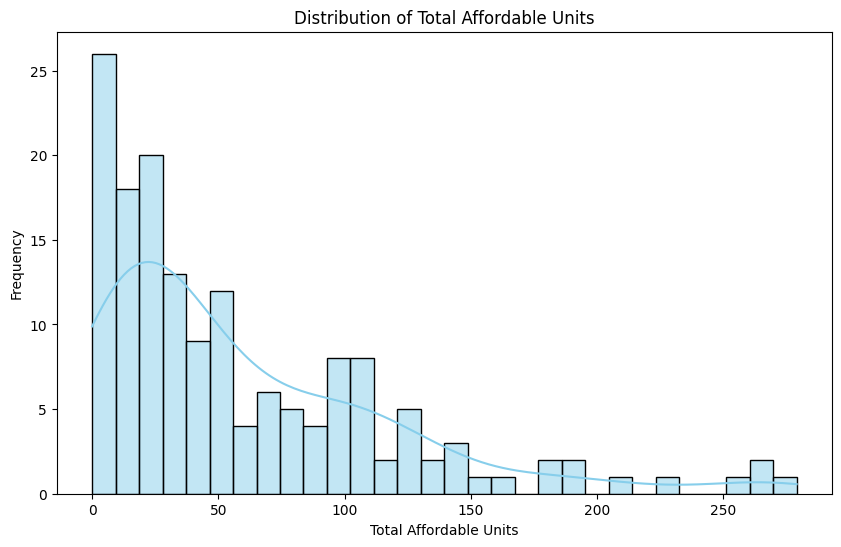

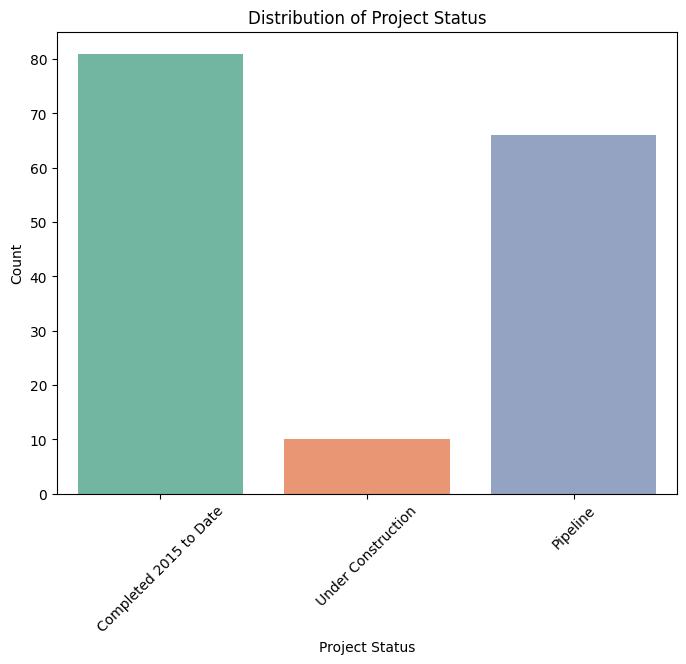

In [6]:
# Plot the distribution of total affordable units
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_AFFORDABLE_UNITS'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Total Affordable Units')
plt.xlabel('Total Affordable Units')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of project statuses
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='STATUS_PUBLIC', palette='Set2')
plt.title('Distribution of Project Status')
plt.xlabel('Project Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Specific Observations of Distribution of TOTAL AFFORDABLE UNITS**

* **Right-Skewed Distribution:** The distribution is right-skewed, meaning there are more projects with a smaller number of affordable units. The majority of projects have fewer than 50 affordable units.

* **Mode:** The mode, or the most frequent value, appears to be around 25-30 affordable units. This indicates that many projects have this number of affordable units.

* **Tail:** The distribution has a long tail to the right, indicating that there are a few projects with a significantly larger number of affordable units. These projects might be larger-scale developments or projects in specific locations with higher demand.

Overlaid Curve: The overlaid curve suggests a potential underlying distribution, possibly a normal or log-normal distribution. However, the actual distribution is skewed, indicating that the data might not perfectly fit a standard distribution.

**Specific Observations of Distribution of Project Status**

* **Dominant Status:** The "Completed 2015 to Date" category has the highest number of projects, indicating that a significant number of projects have been completed since 2015.

* **Pipeline Projects:** The "Pipeline" category has the second-highest number of projects, suggesting that there is a pipeline of projects in the planning and development stages.

* **Under Construction:** The "Under Construction" category has the lowest number of projects, indicating that a smaller number of projects are currently under construction.

# Geographic Distribution of Housing Projects

In [7]:
map_center = [df['LATITUDE'].mean(), df['LONGITUDE'].mean()]
m = folium.Map(location=map_center, zoom_start=12)
for index, row in df.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['PROJECT_NAME'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

m

# Distribution of Affordable Units by Income Bracket

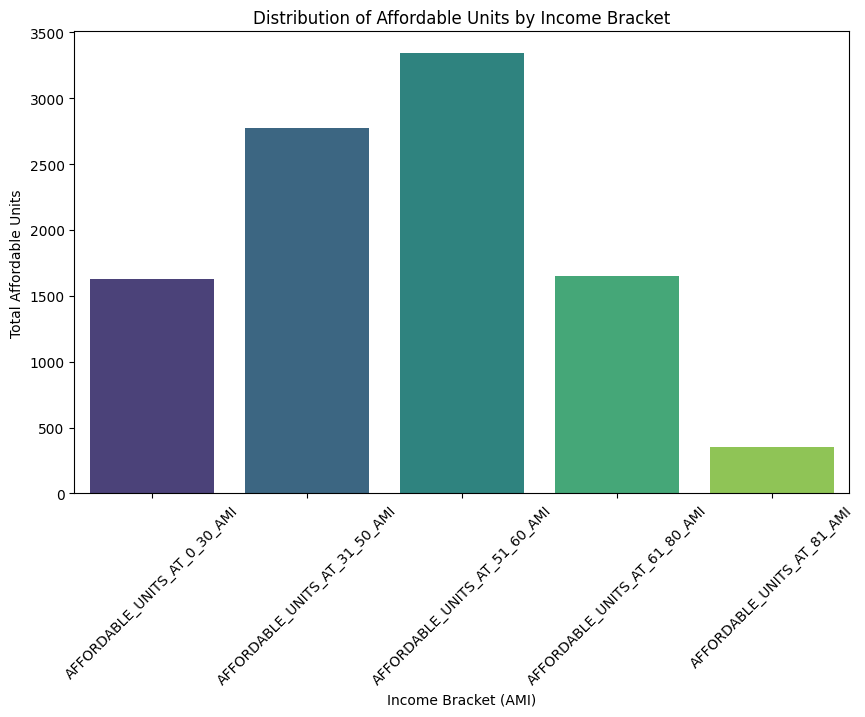

In [8]:
income_brackets = [
    'AFFORDABLE_UNITS_AT_0_30_AMI', 
    'AFFORDABLE_UNITS_AT_31_50_AMI', 
    'AFFORDABLE_UNITS_AT_51_60_AMI', 
    'AFFORDABLE_UNITS_AT_61_80_AMI', 
    'AFFORDABLE_UNITS_AT_81_AMI'
]

income_units = df[income_brackets].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=income_units.index, y=income_units.values, palette='viridis')
plt.title('Distribution of Affordable Units by Income Bracket')
plt.xlabel('Income Bracket (AMI)')
plt.ylabel('Total Affordable Units')
plt.xticks(rotation=45)
plt.show()

**Specific Observations:**

Highest Number of Units:

The 51-60% AMI income bracket has the highest number of affordable housing units, with over 3000 units available. This suggests that housing projects are primarily focused on this middle-income range.
Decreasing Trend:

As we move to lower income brackets, such as 0-30% AMI and 31-50% AMI, the number of affordable units decreases. This might reflect a need for more affordable housing targeting the lowest income groups.
Lowest Number of Units:

The 81% AMI income bracket has the lowest number of affordable units, with approximately 400 units available. This suggests that there may be fewer projects aimed at households with income slightly above the median.

# Affordable Units by Ward

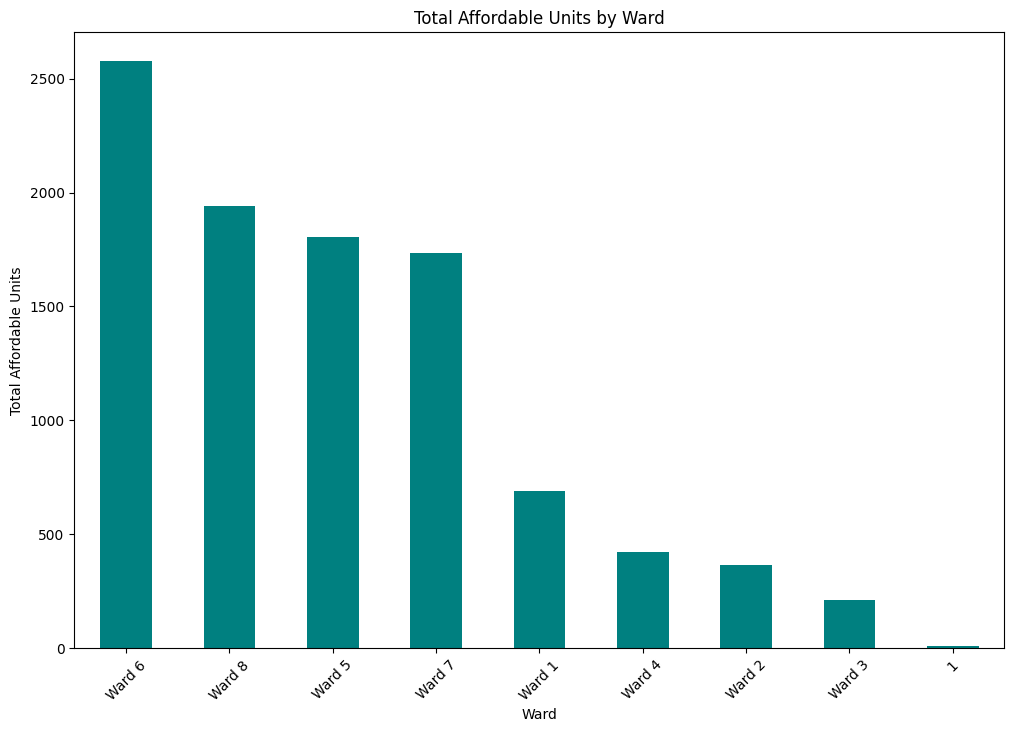

In [9]:
ward_units = df.groupby('MAR_WARD')[income_brackets].sum()
ward_units['TOTAL_UNITS'] = ward_units.sum(axis=1)
plt.figure(figsize=(12, 8))
ward_units['TOTAL_UNITS'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Total Affordable Units by Ward')
plt.xlabel('Ward')
plt.ylabel('Total Affordable Units')
plt.xticks(rotation=45)
plt.show()

**Specific Observations on Affordable Units by Ward:**

Highest Number of Units:

Ward 6 has the highest number of affordable housing units, followed by Ward 8 and Ward 5. This suggests that these wards are likely to have a higher concentration of affordable housing projects, possibly due to urban development or greater funding in these areas.
Decreasing Trend:

There is a general decrease in the number of affordable housing units as we move from Ward 6 to Ward 3. This could reflect a geographic pattern, where more affluent areas may have fewer affordable housing projects or greater availability of market-rate housing.
Lowest Number of Units:

Ward 1 has the lowest number of affordable units, suggesting either limited affordable housing projects in that area or more affluent demographics that do not need as many subsidized units.

# Affordable Units by Project Status

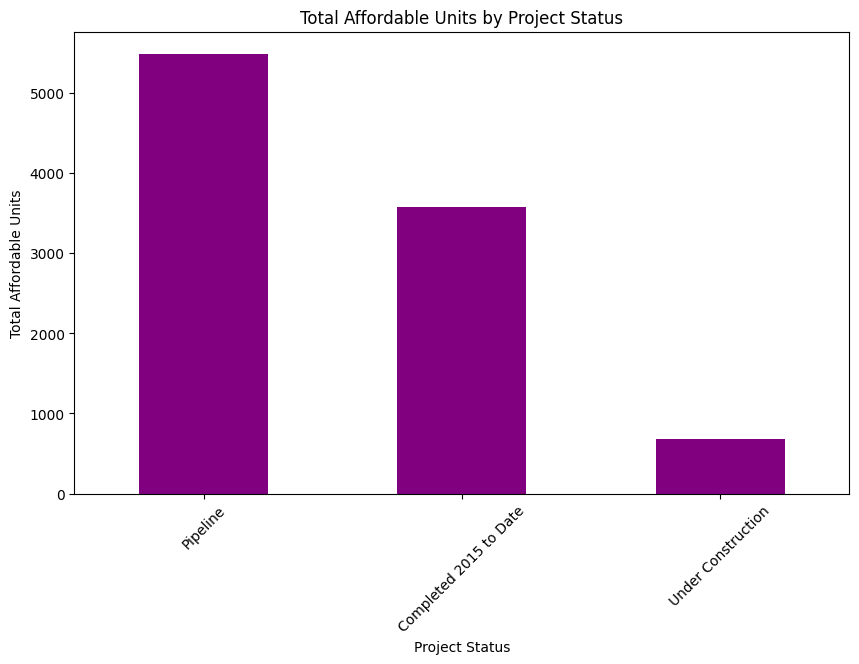

In [10]:
status_units = df.groupby('STATUS_PUBLIC')[income_brackets].sum()
status_units['TOTAL_UNITS'] = status_units.sum(axis=1)
plt.figure(figsize=(10, 6))
status_units['TOTAL_UNITS'].sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Total Affordable Units by Project Status')
plt.xlabel('Project Status')
plt.ylabel('Total Affordable Units')
plt.xticks(rotation=45)
plt.show()

**Specific Observations on Affordable Units by Project Status:**

Pipeline Projects:

The "Pipeline" category has the highest number of affordable units, indicating that a significant number of affordable housing projects are planned but have not yet started. This suggests that there is a large pipeline of future housing projects that could potentially increase the availability of affordable housing.
Completed Projects:

The "Completed 2015 to Date" category comes second in terms of affordable units. This shows a substantial number of projects have been successfully completed in recent years, adding to the available affordable housing stock.
Under Construction:

The "Under Construction" category has the lowest number of affordable units. This suggests that fewer projects are currently under construction, possibly due to delays or prioritization of planned and completed projects over ongoing construction.

# Correlation Between Geographic Coordinates and Affordable Units

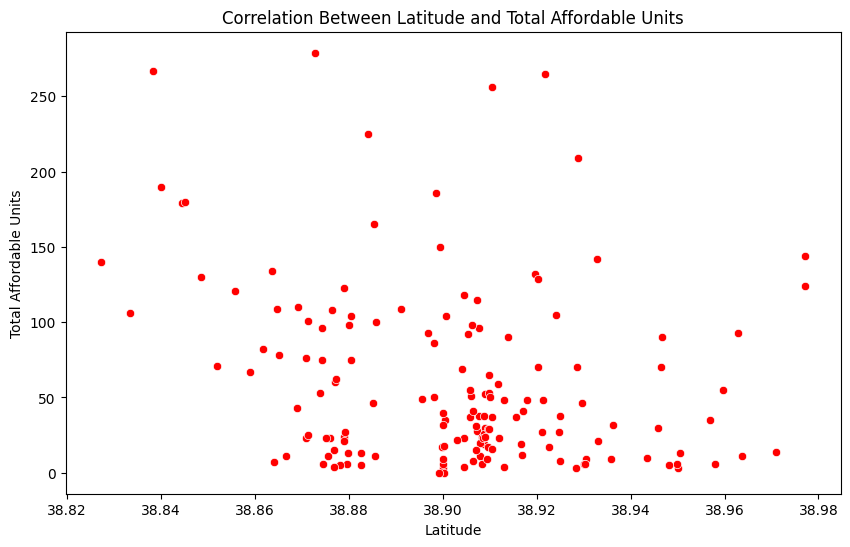

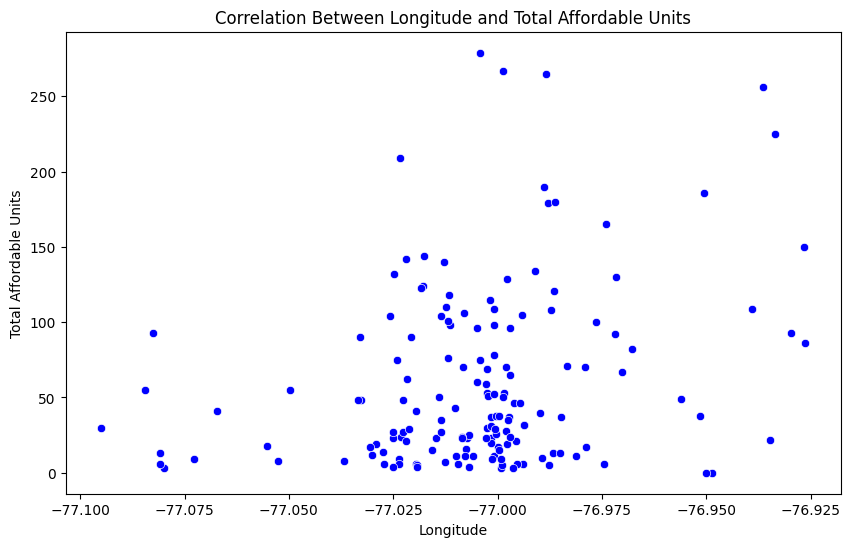

In [11]:
# Scatter plot of Latitude vs Total Affordable Units
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LATITUDE', y='TOTAL_AFFORDABLE_UNITS', color='red')
plt.title('Correlation Between Latitude and Total Affordable Units')
plt.xlabel('Latitude')
plt.ylabel('Total Affordable Units')
plt.show()

# Scatter plot of Longitude vs Total Affordable Units
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LONGITUDE', y='TOTAL_AFFORDABLE_UNITS', color='blue')
plt.title('Correlation Between Longitude and Total Affordable Units')
plt.xlabel('Longitude')
plt.ylabel('Total Affordable Units')
plt.show()

**Specific Observations on Geographic Distribution:**

Latitude vs Affordable Units:

Scattered Distribution: The points are scattered across the graph with no clear linear trend, indicating that latitude does not have a strong linear correlation with the number of affordable housing units.
Clustering: Some clusters of points are visible, which suggests that certain latitude ranges have a higher concentration of affordable units. However, these clusters are not well-defined and overlap with each other.
Outliers: A few points are located far from the main cluster, potentially representing outliers in the data. These could indicate areas with unique characteristics or anomalies in the data.
Longitude vs Affordable Units:

Scattered Distribution: The points are scattered across the graph, showing no clear linear relationship between longitude and the number of affordable units.
Clustering: Similar to latitude, there are clusters in certain longitude ranges with higher concentrations of affordable units, though the clusters are not well-defined and overlap with each other.
Outliers: Some points are far from the main clusters, which might indicate outliers or unusual data points in terms of geographic location or project specifics.

# Temporal Analysis of Affordable Units

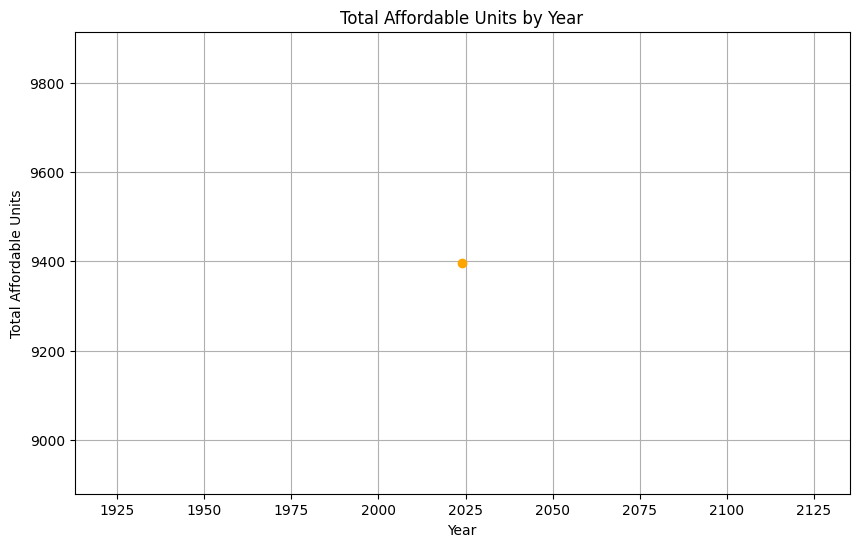

In [12]:
df['GIS_LAST_MOD_DTTM'] = pd.to_datetime(df['GIS_LAST_MOD_DTTM'], errors='coerce')
df['Year'] = df['GIS_LAST_MOD_DTTM'].dt.year

yearly_units = df.groupby('Year')['TOTAL_AFFORDABLE_UNITS'].sum()

plt.figure(figsize=(10, 6))
yearly_units.plot(kind='line', marker='o', color='orange')
plt.title('Total Affordable Units by Year')
plt.xlabel('Year')
plt.ylabel('Total Affordable Units')
plt.grid(True)
plt.show()

**Specific Observations on Temporal Analysis:**

Single Data Point:

The graph has only one data point, corresponding to the year 2025. This suggests that the available data for the number of affordable housing units is limited to this specific year. This might indicate that the dataset is not fully updated or that the data is only available for recently completed or projected projects.
Number of Affordable Units:

The data point for 2025 indicates that there are approximately 9,400 affordable units. This suggests a significant number of affordable housing projects are planned for completion or are under consideration in this year.

# Affordable Units by AMI Categories

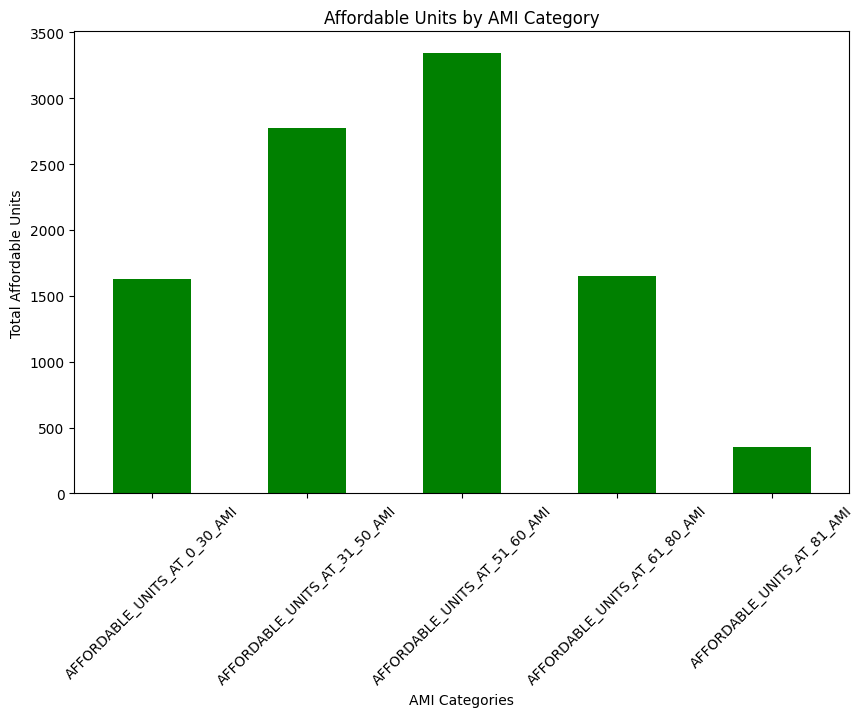

In [13]:
ami_columns = ['AFFORDABLE_UNITS_AT_0_30_AMI', 'AFFORDABLE_UNITS_AT_31_50_AMI', 
               'AFFORDABLE_UNITS_AT_51_60_AMI', 'AFFORDABLE_UNITS_AT_61_80_AMI', 
               'AFFORDABLE_UNITS_AT_81_AMI']

ami_units = df[ami_columns].sum()

plt.figure(figsize=(10, 6))
ami_units.plot(kind='bar', color='green')
plt.title('Affordable Units by AMI Category')
plt.xlabel('AMI Categories')
plt.ylabel('Total Affordable Units')
plt.xticks(rotation=45)
plt.show()

**Specific Observations on Affordable Units by AMI Categories:**

Highest Number of Units:

The 51-60% AMI income bracket has the highest number of affordable units, with over 3,000 units available. This suggests that a significant portion of affordable housing projects are targeted at households with incomes around 51-60% of the Area Median Income.
Decreasing Trend:

As we move to the lower income brackets (0-30% AMI and 31-50% AMI), the number of affordable units decreases. This could indicate that there are fewer projects focused on extremely low-income households compared to those aimed at households with slightly higher incomes.
Lowest Number of Units:

The 81% AMI income bracket has the lowest number of affordable units, with only around 400 units available. This suggests that there are relatively few affordable housing projects for households with incomes at or above 81% of the Area Median Income, potentially reflecting a shift in focus towards more low-income households.

# Affordable Housing Data Analysis Report



#### Overview:

This analysis examines affordable housing projects in Washington, DC, using data about the number of affordable units, project statuses, geographic locations, and other factors. By analyzing these trends, we can provide insights useful for various stakeholders such as investors, policymakers, and business professionals.

---

### Key Findings:

#### 1. **Project Status Breakdown**:

- **Dominant Status**: The **"Completed 2015 to Date"** category has the highest number of projects, indicating a significant number of affordable housing projects have been completed since 2015.
- **Pipeline Projects**: The **"Pipeline"** category has the second-highest number of projects, showing that many projects are currently in the planning and development stages.
- **Under Construction**: The **"Under Construction"** category has the lowest number of projects, suggesting that fewer projects are currently under construction compared to completed or planned ones.

  **Stakeholder Implication**:
  - **Investors/Businessmen**: The presence of many projects in the **Pipeline** category offers investment opportunities in projects that are planned but not yet started. However, those seeking quicker returns may want to focus on **completed** projects.
  - **Government/Policy Makers**: Focusing on streamlining and accelerating the construction phase could ensure more housing is made available more quickly to meet demand.

#### 2. **Distribution of Affordable Units in Projects**:

- **Right-Skewed Distribution**: The distribution of the number of affordable units is right-skewed. This means that most projects have fewer than 50 affordable units, with only a few projects having a larger number of units.
- **Mode**: The most frequent number of affordable units in a project appears to be around **25-30 units**, suggesting that this is the typical size for affordable housing projects.
- **Tail**: The distribution has a long tail to the right, indicating that there are a few large-scale projects with a significantly higher number of affordable units. These projects could be focused in high-demand areas or larger developments.

  **Stakeholder Implication**:
  - **Investors/Businessmen**: While most affordable housing projects tend to be smaller, there are opportunities in larger developments with higher unit counts. These larger projects might provide higher returns but could come with more significant risks and longer timelines.
  - **Government/Policy Makers**: A large number of smaller projects may require more coordination and funding from local agencies to ensure they are spread evenly across neighborhoods to meet the broader housing needs.

#### 3. **Geographic and Income-Based Insights**:

- The **distribution of affordable units** across **wards** (e.g., Ward 6 and Ward 8) shows that certain areas are more heavily targeted for affordable housing. While this is beneficial in addressing housing shortages in these areas, there may be a need to distribute affordable housing more evenly across the city, especially in low-supply regions like **Ward 1**.

- The majority of affordable units fall within the **51-60% AMI** income bracket, with fewer units available in the **lower** income brackets (**0-30% AMI** and **31-50% AMI**), suggesting that a lot of the housing is targeted toward middle-income residents rather than extremely low-income individuals.

---

### Conclusions and Stakeholder Implications:

#### **For Investors and Businessmen**:
- **Opportunities in Pipeline Projects**: There is a significant opportunity in the **pipeline projects**, which have not yet started. These projects could offer high returns, especially once they are completed and in high-demand areas.
- **Small Projects Dominating**: Most projects are smaller, typically offering **25-30 units**. However, there are also larger projects that can potentially bring in higher returns. It’s important to evaluate both small and large-scale projects based on risk tolerance and timelines.
- **Geographic Focus**: Investing in areas like **Ward 6**, **Ward 8**, and **Ward 5** is likely to offer a better return due to the larger number of affordable units.

#### **For Government and Policy Makers**:
- **Focus on Accelerating Construction**: Given that there are many projects in the **pipeline** and fewer under construction, there may be a need to expedite the construction process to meet housing demands more quickly.
- **Increase Affordable Units for Lower Income Brackets**: A larger focus on **0-30% AMI** projects could address housing needs for the most economically vulnerable populations.
- **Geographic Redistribution**: Areas with fewer affordable units, such as **Ward 1**, might benefit from additional affordable housing projects to ensure equity across the city.

#### **For Individuals and Families**:
- **Access to Affordable Housing**: Depending on income levels and the location of affordable housing projects, some individuals may find it more challenging to access housing in certain areas. The distribution of units suggests that those in **lower-income brackets** may have fewer housing options available.

---

### External Factors (Macro/Micro Influences):

- **Macro Factors**:  
  - **Economic conditions** (such as inflation, employment rates, and interest rates) can directly impact both the affordability of housing and the feasibility of financing new housing projects.
  - **Government funding** and **subsidies** for affordable housing play a significant role in ensuring projects meet the needs of low and moderate-income individuals.

- **Micro Factors**:  
  - **Local zoning laws** and **construction regulations** influence the speed and feasibility of affordable housing developments, with some areas potentially being more challenging to develop due to these constraints.
  - **Demand for housing** will fluctuate based on population growth, urbanization trends, and the economic stability of specific regions within Washington, DC.

---

This updated analysis provides a comprehensive understanding of the current and future landscape of affordable housing in Washington, DC. Stakeholders can use this information to make strategic decisions about investments, policy changes, and housing development initiatives.t investments, policy changes, and housing development initiatives.ousing in Washington, DC, offering valuable insights for decision-making.

## Notebook By Malik Muhammad Ahmed (Data Scientist & Business Analyst)